In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from time import perf_counter 
import os
import seaborn as sns
from PIL import Image 
from PIL import ImageEnhance
#from skimage.io import imread
from skimage.io import imread
import matplotlib.pyplot as plt
import os, random, pathlib, warnings, itertools, math
warnings.filterwarnings("ignore")
import tensorflow as tf
import tensorflow.keras.backend as K
from sklearn.metrics import confusion_matrix
from tensorflow.keras import models
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
#from keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, LeakyReLU
from tensorflow.keras.layers import BatchNormalization, Activation, Conv2D 
from tensorflow.keras.applications import ResNet101V2
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Dense, Dropout
K.clear_session()

In [2]:
## Defining batch specfications
batch_size = 100
img_height = 250
img_width = 250

In [5]:
#load the training data
# training_data = tf.keras.preprocessing.image_dataset_from_directory("/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train",
#     seed=42,
#     image_size= (img_height, img_width),
#     batch_size=batch_size
# )
training_data = tf.keras.preprocessing.image_dataset_from_directory(r"C:\Users\priya\Downloads\archive\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train",
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size
)

Found 70295 files belonging to 38 classes.


In [7]:
#getting the validation data 
validation_data = tf.keras.preprocessing.image_dataset_from_directory(r"C:\Users\priya\Downloads\archive\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid",
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size
)

Found 17572 files belonging to 38 classes.


In [10]:
#storing the label names
target_names = training_data.class_names
print(target_names)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [12]:
#Building the AlexNet architecture 
model = Sequential()
# 1st Convolutional Layer
model.add(Conv2D(filters = 96, input_shape = (250, 250, 3),
kernel_size = (11, 11), strides = (4, 4),
padding = 'valid'))
model.add(Activation('relu'))
# Max-Pooling
model.add(MaxPooling2D(pool_size = (2, 2),
strides = (2, 2), padding = 'valid'))
# Batch Normalisation
model.add(BatchNormalization())
# 2nd Convolutional Layer
model.add(Conv2D(filters = 256, kernel_size = (11, 11),
strides = (1, 1), padding = 'valid'))
model.add(Activation('relu'))
# Max-Pooling
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2),
padding = 'valid'))
# Batch Normalisation
model.add(BatchNormalization())
# 3rd Convolutional Layer
model.add(Conv2D(filters = 384, kernel_size = (3, 3),
strides = (1, 1), padding = 'valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())
# 4th Convolutional Layer
model.add(Conv2D(filters = 384, kernel_size = (3, 3),
strides = (1, 1), padding = 'valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())
# 5th Convolutional Layer
model.add(Conv2D(filters = 256, kernel_size = (3, 3),
strides = (1, 1), padding = 'valid'))
model.add(Activation('relu'))
# Max-Pooling
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2),
padding = 'valid'))
# Batch Normalisation
model.add(BatchNormalization())
# Flattening
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape = (250*250*3, )))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())
# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())
# Output Softmax Layer
model.add(Dense(len(target_names)))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 60, 60, 96)        34944     
                                                                 
 activation_8 (Activation)   (None, 60, 60, 96)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 30, 96)       0         
 2D)                                                             
                                                                 
 batch_normalization_7 (Batc  (None, 30, 30, 96)       384       
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 256)       2973952   
                                                                 
 activation_9 (Activation)   (None, 20, 20, 256)      

In [13]:
#compile the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [14]:
#training and validation
my_model = model.fit(training_data,validation_data= validation_data,epochs = 5)

Epoch 1/5
703/703 [==============================] - 6301s 9s/step - loss: 1.5553 - accuracy: 0.5782 - val_loss: 3.8339 - val_accuracy: 0.3466
Epoch 2/5
703/703 [==============================] - 5982s 9s/step - loss: 0.6540 - accuracy: 0.8015 - val_loss: 0.9951 - val_accuracy: 0.7144
Epoch 3/5
703/703 [==============================] - 5915s 8s/step - loss: 0.4589 - accuracy: 0.8586 - val_loss: 0.8809 - val_accuracy: 0.7604
Epoch 4/5
703/703 [==============================] - 5883s 8s/step - loss: 0.3502 - accuracy: 0.8892 - val_loss: 0.4650 - val_accuracy: 0.8597
Epoch 5/5
703/703 [==============================] - 6383s 9s/step - loss: 0.3062 - accuracy: 0.9043 - val_loss: 0.7577 - val_accuracy: 0.7990


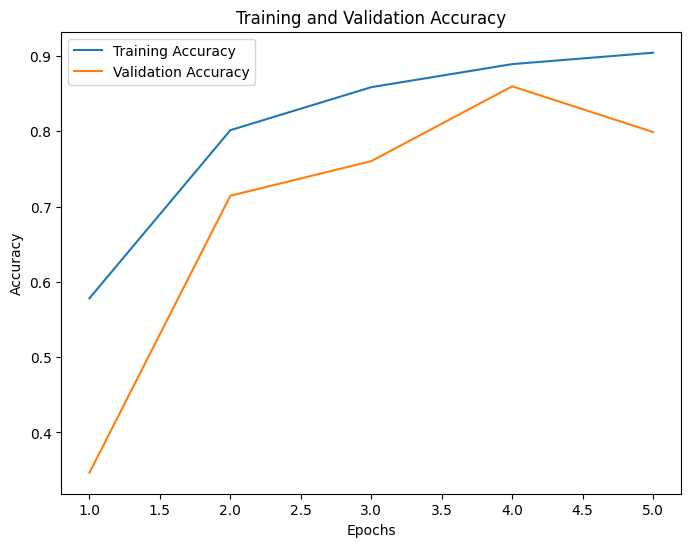

In [15]:
train_accuracy = my_model.history['accuracy']
val_accuracy = my_model.history['val_accuracy']

# Plotting the accuracy values across epochs
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

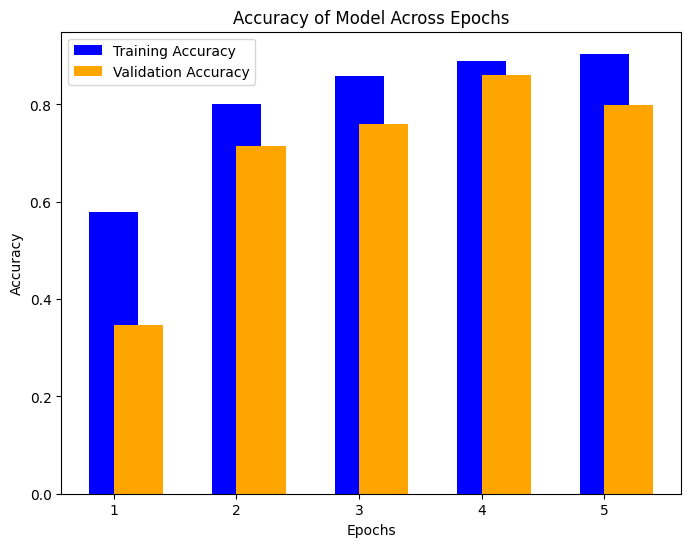

In [30]:
epochs = range(1, len(train_accuracy) + 1)

plt.figure(figsize=(8, 6))
plt.bar(epochs, train_accuracy, width=0.4, align='center', label='Training Accuracy', color='blue')
plt.bar(epochs, val_accuracy, width=0.4, align='edge', label='Validation Accuracy', color='orange')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy of Model Across Epochs')
plt.legend()
plt.xticks(epochs)

plt.show()

In [23]:
#saving the model 
#model.save("/kaggle/working/AlexNetModel.hdf5")
# Save the model to a specific directory on your local machine
model.save("C:/Users/priya/Downloads/archive/AlexNetModel.hdf5")
model.save("AlexNetModel.hdf5")

In [29]:
#testing the model with test image 
import imageio
import tensorflow
from tensorflow import keras
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.models import load_model
from PIL import Image
target_names = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']
def run(source = None):
    model = tensorflow.keras.models.load_model('C:/Users/priya/Downloads/archive/AlexNetModel.hdf5')
    img = imageio.imread(source)
    #img = Image.fromarray(img).resize((224, 224))
    img = Image.fromarray(img).resize((250, 250))
    x = img_to_array(img)
    x = np.expand_dims(img, axis=0)
    x = x/255
    prediction = model.predict(x)
    print("Predicted Image is:",target_names[np.argmax(prediction)])
run(source=r"C:\Users\priya\Downloads\archive\test\test\TomatoYellowCurlVirus6.JPG")

1/1 [==============================] - 1s 653ms/step
Predicted Image is: Tomato___Late_blight


In [1]:
import os

current_directory = os.getcwd()
print("Current directory:", current_directory)


Current directory: C:\Users\priya
